<a href="https://colab.research.google.com/github/cflores23/optimizacion/blob/main/Images_Kernel_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from skimage.io import imread
import numpy as np
import plotly.express as px
#from statsmodels.nonparametric.kernel_regression.KernelReg import Kernel
import plotly.graph_objs as go
import pandas as pd 

In [ ]:
image = imread("lena.jpeg")
type(image)

numpy.ndarray

In [ ]:
image.shape

(1960, 1960, 3)

In [ ]:
image.ndim

3

In [ ]:
red = image[:, :, 0]
red

array([[156, 158, 158, ...,  57,  54,  58],
       [156, 158, 159, ...,  57,  53,  57],
       [156, 159, 159, ...,  58,  56,  59],
       ...,
       [ 56,  55,  55, ..., 118, 116, 115],
       [ 58,  56,  56, ..., 118, 117, 117],
       [ 62,  58,  56, ..., 116, 118, 120]], dtype=uint8)

Regresión Kernel

In [ ]:
np.random.seed(1)
# xwidth controls the range of x values.
xwidth = 20
x = np.arange(0,xwidth,1)
# we want to add some noise to the x values so that dont sit at regular intervals
x_residuals = np.random.normal(scale=0.2, size=[x.shape[0]])
# new_x is the range of x values we will be using all the way through
new_x = x + x_residuals
# We generate residuals for y values since we want to show some variation in the data
num_points = x.shape[0]
residuals = np.random.normal(scale=2.0, size=[num_points])
# We will be using fun_y to generate y values all the way through
fun_y = lambda x: -(x*x) + residuals

In [ ]:
# Plot the x and y values 
px.scatter(x=new_x,y=fun_y(new_x), title='Figure 1:  Visualizing the generated data')


In [ ]:
kernel_x = np.arange(-xwidth,xwidth, 0.1)
bw_manual = 1
def gauss_const(h):
    """
    Returns the normalization constant for a gaussian
    """
    return 1/(h*np.sqrt(np.pi*2))
def gauss_exp(ker_x, xi, h): 
    """
    Returns the gaussian function exponent term
    """
    num =  - 0.5*np.square((xi- ker_x))
    den = h*h
    return num/den
def kernel_function(h, ker_x, xi): 
    """
    Returns the gaussian function value. Combines the gauss_const and
    gauss_exp to get this result
    """
    const = gauss_const(h)
    gauss_val = const*np.exp(gauss_exp(ker_x,xi,h))
    return gauss_val
# We are selecting a single point and calculating the Kernel value
input_x = new_x[0]
col1 = gauss_const(bw_manual)
col2= gauss_exp(kernel_x, input_x, bw_manual)
col3 = kernel_function(bw_manual, kernel_x, input_x)

In [ ]:
# Dataframe for a single observation point x_i. In the code x_i comes from new_x
data = {'Input_x': [input_x for x in range(col2.shape[0])],
        'kernel_x': kernel_x,
        'gaussian_const': [col1 for x in range(col2.shape[0])],
        'gaussian_exp': col2,
        'full_gaussian_value': col3,
        'bw':[bw_manual for x in range(col2.shape[0])],
        }
single_pt_KE = pd.DataFrame(data=data)
single_pt_KE

,Input_x,kernel_x,gaussian_const,gaussian_exp,full_gaussian_value,bw
0,0.324869,-20.0,0.398942,-206.550151,7.894399e-91,1
1,0.324869,-19.9,0.398942,-204.522665,5.995777e-90,1
2,0.324869,-19.8,0.398942,-202.505178,4.508467e-89,1
3,0.324869,-19.7,0.398942,-200.497691,3.356366e-88,1
4,0.324869,-19.6,0.398942,-198.500204,2.473813e-87,1
...,...,...,...,...,...,...
395,0.324869,19.5,0.398942,-183.842823,5.740986e-81,1
396,0.324869,19.6,0.398942,-185.765336,8.395560e-82,1
397,0.324869,19.7,0.398942,-187.697849,1.215542e-82,1
398,0.324869,19.8,0.398942,-189.640362,1.742397e-83,1


In [ ]:
# Plotting a scatter plot of Kernel 
px.line(x=kernel_x, y=col3, title='Figure 3: Kernel function for a single input value')

In [ ]:
## Plotting gaussian for all input x points 
kernel_fns = {'kernel_x': kernel_x}
for input_x in new_x: 
    input_string= 'x_value_{}'.format(np.round(input_x,2)) 
    kernel_fns[input_string] = kernel_function(bw_manual, kernel_x, input_x)
kernels_df = pd.DataFrame(data=kernel_fns)
y_all = kernels_df.drop(columns='kernel_x')
px.line(kernels_df, x='kernel_x', y=y_all.columns, title='Gaussian for all input points', range_x=[-5,20])

In [ ]:
def weights(bw_manual, input_x, all_input_values ): 
    w_row = []
    for x_i in all_input_values: 
        ki = kernel_function(bw_manual, x_i, input_x)
        ki_sum = np.sum(kernel_function(bw_manual, all_input_values, input_x))
        w_row.append(ki/ki_sum)
    return w_row
def single_y_pred(bw_manual, input_x, new_x): 
    w = weights(bw_manual, input_x, new_x)
    y_single = np.sum(np.dot(fun_y(new_x),w))
    return y_single
ypred_single = single_y_pred(bw_manual, new_x[0], new_x)

In [ ]:
Y_pred = []
for input_x in new_x: 
    w = []
    Y_single = single_y_pred(bw_manual, input_x, new_x)
    Y_pred.append(Y_single)

In [ ]:
data= {'x': new_x, 'y': fun_y(new_x), 'y_manual': np.array(y_all)}
fig = px.scatter(x=new_x,y=fun_y(x))
fig.add_trace(go.Scatter(x=new_x, y=Y_pred, name='Statsmodel KR',  mode='lines'))
fig.add_trace(go.Scatter(x=new_x, y=np.array(Y_pred), name='Manual KR',  mode='lines'))

Implementación de Kernel Regressión para covid dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.kernel_regression import KernelReg

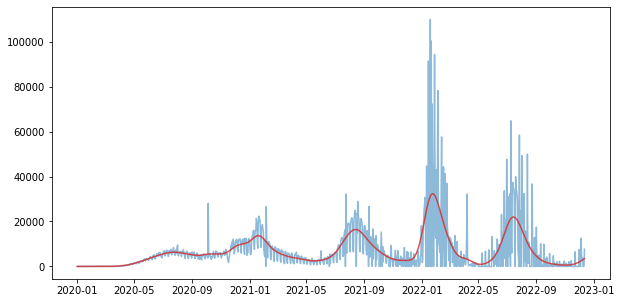

In [9]:
from datetime import datetime
import pandas as pd

owid_url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

df = pd.read_csv(owid_url)

# filtering for Nepal data
mex = df[df['iso_code'] == 'MEX']

mex_nan = mex.replace(np.nan,0)

# converting string type to datetime 
mex_time = pd.to_datetime(mex_nan['date'])
new_cases = mex_nan['new_cases']

n = mex.shape[0]

kde = KernelReg(endog=new_cases,exog=np.arange(n),var_type='c',bw=[12])

estimator = kde.fit(np.arange(n))
estimator = np.reshape(estimator[0],n)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(mex_time, new_cases, '-',alpha=0.5)
ax.plot(mex_time, estimator, '-',color='tab:red',alpha=0.8)

plt.show()


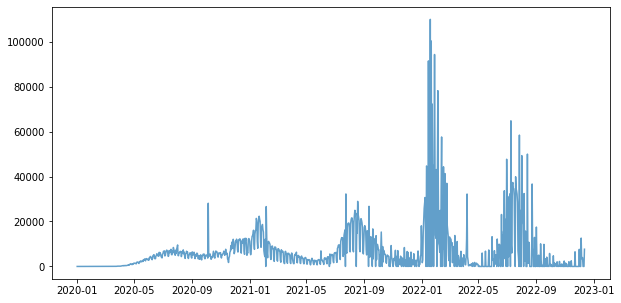

In [5]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(mex_time, new_cases, '-',alpha=0.7)

In [6]:
mex_nan.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.077000e+03,1077.000000,1077.000000,1077.00000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1.077000e+03,1077.000,1.077000e+03,1077.00,1.077000e+03,1077.0,1077.000000,1077.000000,1077.000000,1077.000000
mean,3.069453e+06,6653.240483,6640.718799,197033.40390,300.533890,299.902911,24073.366728,52.180587,52.082393,1545.310116,...,2.140000e+01,87.847,1.380000e+00,75.05,7.790000e-01,127504120.0,55837.473723,4.455627,4.084754,437.926819
std,2.446950e+06,10690.340615,7493.617321,123380.80959,354.127925,288.962729,19191.142615,83.843102,58.771569,967.661354,...,3.554364e-15,0.000,2.221478e-16,0.00,1.110739e-16,0.0,168128.546485,12.593526,17.421236,1318.612657
min,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.140000e+01,87.847,1.380000e+00,75.05,7.790000e-01,127504120.0,-7691.800000,-3.530000,-13.170000,-60.325894
25%,7.264310e+05,396.000000,2028.000000,76243.00000,8.000000,30.857000,5697.314000,3.106000,15.905000,597.965000,...,2.140000e+01,87.847,1.380000e+00,75.05,7.790000e-01,127504120.0,0.000000,0.000000,0.000000,0.000000
50%,2.482784e+06,3891.000000,4476.286000,231505.00000,188.000000,209.857000,19472.186000,30.517000,35.107000,1815.667000,...,2.140000e+01,87.847,1.380000e+00,75.05,7.790000e-01,127504120.0,0.000000,0.000000,0.000000,0.000000
75%,5.624954e+06,7187.000000,8435.857000,321806.00000,493.000000,511.714000,44115.861000,56.367000,66.161000,2523.887000,...,2.140000e+01,87.847,1.380000e+00,75.05,7.790000e-01,127504120.0,0.000000,0.000000,0.000000,0.000000
max,7.164392e+06,109895.000000,49322.000000,330701.00000,3050.000000,1427.714000,56189.494000,861.894000,386.827000,2593.650000,...,2.140000e+01,87.847,1.380000e+00,75.05,7.790000e-01,127504120.0,679123.900000,50.250000,167.990000,5326.289849


In [ ]:
mex_nan.head(100)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
138190,MEX,North America,Mexico,2020-01-01,0.0,0.0,0.000,0.0,0.0,0.000,...,21.4,87.847,1.38,75.05,0.779,127504120.0,0.0,0.00,0.00,0.000000
138191,MEX,North America,Mexico,2020-01-02,0.0,0.0,0.000,0.0,0.0,0.000,...,21.4,87.847,1.38,75.05,0.779,127504120.0,0.0,0.00,0.00,0.000000
138192,MEX,North America,Mexico,2020-01-03,0.0,0.0,0.000,0.0,0.0,0.000,...,21.4,87.847,1.38,75.05,0.779,127504120.0,0.0,0.00,0.00,0.000000
138193,MEX,North America,Mexico,2020-01-04,0.0,0.0,0.000,0.0,0.0,0.000,...,21.4,87.847,1.38,75.05,0.779,127504120.0,0.0,0.00,0.00,0.000000
138194,MEX,North America,Mexico,2020-01-05,0.0,0.0,0.000,0.0,0.0,0.000,...,21.4,87.847,1.38,75.05,0.779,127504120.0,12.3,0.07,0.07,0.096467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138285,MEX,North America,Mexico,2020-04-05,2143.0,253.0,164.286,94.0,15.0,10.571,...,21.4,87.847,1.38,75.05,0.779,127504120.0,-7691.8,-3.53,-5.32,-60.325894
138286,MEX,North America,Mexico,2020-04-06,2439.0,296.0,192.143,125.0,31.0,13.857,...,21.4,87.847,1.38,75.05,0.779,127504120.0,0.0,0.00,0.00,0.000000
138287,MEX,North America,Mexico,2020-04-07,2785.0,346.0,224.286,141.0,16.0,16.000,...,21.4,87.847,1.38,75.05,0.779,127504120.0,0.0,0.00,0.00,0.000000
138288,MEX,North America,Mexico,2020-04-08,3181.0,396.0,257.571,174.0,33.0,19.571,...,21.4,87.847,1.38,75.05,0.779,127504120.0,0.0,0.00,0.00,0.000000


In [ ]:
estimator[100]

nan